In [1]:
import os, sys, json
from collections import Counter

In [2]:
# SELECTED_INPUT_ID = "input_zeroshot_only-failed_edit" 
SELECTED_INPUT_ID = "input_ours_deepseek_zeroshot_only-failed_self-refine"

### Getting all important json files

In [3]:

A4_DIR = "/home/anmola/assignments_hw/anlp_final_proj/outputs_A4"
A3_DIR = "/home/anmola/assignments_hw/anlp_final_proj/outputs_A3"
# find all json files recursively in the directory
def find_json_files_in_dir(directory):
    json_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            # print(file)
            if file.endswith('.jsonl'):
                json_files.append(os.path.join(root, file))
    return json_files

json_files = find_json_files_in_dir(A4_DIR)
json_files+= find_json_files_in_dir(A3_DIR)


json_files = [x for x in json_files if "do_not_use" not in x]
# json_files = [x for x in json_files if "DPO_NO" not in x]
# json_files = [x for x in json_files if "profiler" not in x]
print("Total number of json files: ", len(json_files))

# here is the filename: generated_codes_deepseek_base_1e-4_NO_cot_speed_incorrect_samples_10_epoch_edit_deepseek_instruct_nrowsNone_tokens1024_temp0.0_fewshotex0_samples1_2024-12-08_00:33:24.jsonl 

# remove timestamp from the filename BUT retain the extension
def remove_timestamp_from_filename(filename):
    return filename.rsplit('_', 2)[0] + ".jsonl"


# read all the json files and map the filename to the data
inference_outputs_df = {}
judge_results_df = {}

for file in json_files:
    print(f"{file=}")
    file_category = "infer" if "inference_outputs" in file else "judge"
    FILE_CAT = "ours_" if "outputs_A4" in file else "baseline_"
    if file_category == "infer":
        with open(file, 'r') as f:
            data = f.readlines()
            data = [json.loads(x) for x in data]
            _use_filename = remove_timestamp_from_filename(os.path.basename(file))
            _use_filename = FILE_CAT+_use_filename
            inference_outputs_df[_use_filename] = data
    else:
        with open(file, 'r') as f:
            data = json.load(f)
            _use_filename = remove_timestamp_from_filename(os.path.basename(file))
            _use_filename = _use_filename.replace("generated_codes_1_", "")
            _use_filename = _use_filename.replace("generated_codes_", "")
            _use_filename = FILE_CAT+_use_filename
            judge_results_df[_use_filename] = data

print("Total number of inference files: ", len(inference_outputs_df))
print("Total number of judge files: ", len(judge_results_df))
assert(len(inference_outputs_df) == len(judge_results_df))

# get sorted base filenames
sorted_base_filenames = sorted(list(inference_outputs_df.keys()) + list(judge_results_df.keys()))
print("Total number of sorted base filenames: ", len(sorted_base_filenames))
print("Example sorted base filenames: ", *sorted_base_filenames, sep='\n')
# number of unique elements print
print("Number of unique elements in sorted_base_filenames: ", len(set(sorted_base_filenames)))
unique_sorted_base_filenames = set(sorted_base_filenames)


Total number of json files:  52
file='/home/anmola/assignments_hw/anlp_final_proj/outputs_A4/DPO_SPEED_AND_PASS1_FILTERING/judge_outputs/generated_codes_deepseek_base_1e-4_NO_cot_speed_incorrect_samples_10_epoch_edit_deepseek_instruct_nrowsNone_tokens1024_temp0.0_fewshotex0_samples1_2024-12-08_00:33:24.jsonl'
file='/home/anmola/assignments_hw/anlp_final_proj/outputs_A4/DPO_SPEED_AND_PASS1_FILTERING/judge_outputs/generated_codes_deepseek_base_1e-4_NO_cot_speed_incorrect_samples_10_epoch_edit_deepseek_instruct_nrowsNone_tokens1024_temp0.0_fewshotex2_samples1_2024-12-07_22:43:54.jsonl'
file='/home/anmola/assignments_hw/anlp_final_proj/outputs_A4/DPO_SPEED_AND_PASS1_FILTERING/judge_outputs/generated_codes_1_deepseek_base_1e-4_NO_cot_speed_incorrect_samples_10_epoch_self-refine_deepseek_instruct_nrowsNone_tokens1024_temp0.0_fewshotex0_samples1_2024-12-07_23:21:55.jsonl'
file='/home/anmola/assignments_hw/anlp_final_proj/outputs_A4/DPO_SPEED_AND_PASS1_FILTERING/inference_outputs/deepseek_base

In [4]:
len(inference_outputs_df), len(judge_results_df)

(26, 26)

In [5]:
# print common keys between two inference_outputs_df and judge_results_df
common_keys = set(inference_outputs_df.keys()) & set(judge_results_df.keys())
# find uncommon keys between two inference_outputs_df and judge_results_df
uncommon_keys = set(inference_outputs_df.keys()) ^ set(judge_results_df.keys())
print("Common keys between two inference_outputs_df and judge_results_df: ", common_keys)
print("Uncommon keys between two inference_outputs_df and judge_results_df: ", uncommon_keys)

Common keys between two inference_outputs_df and judge_results_df:  {'ours_deepseek_base_1e-4_NO_cot_only_failed_samples_100_ckpt_self-refine_deepseek_instruct_nrowsNone_tokens1024_temp0.0_fewshotex0_samples1.jsonl', 'ours_deepseek_base_1e-4_NO_cot_only_speed_samples_10_epoch_self-refine_deepseek_instruct_nrowsNone_tokens1024_temp0.0_fewshotex0_samples1.jsonl', 'ours_No_Finetune_edit_codellama_13b_instruct_nrowsNone_tokens1024_temp0.0_fewshotex2_samples1_profiled_keep_only_profiled.jsonl', 'baseline_edit_codellama_13b_instruct_nrowsNone_tokens1024_temp0.4_fewshotex0_samples1.jsonl', 'ours_deepseek_base_1e-4_NO_cot_only_speed_samples_10_epoch_edit_deepseek_instruct_nrowsNone_tokens1024_temp0.0_fewshotex2_samples1.jsonl', 'ours_deepseek_base_1e-4_NO_cot_only_failed_samples_100_ckpt_edit_deepseek_instruct_nrowsNone_tokens1024_temp0.0_fewshotex2_samples1.jsonl', 'ours_deepseek_base_1e-4_NO_cot_speed_incorrect_samples_10_epoch_edit_deepseek_instruct_nrowsNone_tokens1024_temp0.0_fewshotex0_s

In [6]:
unique_sorted_base_filenames, len(unique_sorted_base_filenames)

({'baseline_SFT_FS_edit_deepseek_instruct_nrowsNone_tokens1024_temp0.4_fewshotex2_samples1.jsonl',
  'baseline_edit_codellama_13b_instruct_nrowsNone_tokens1024_temp0.4_fewshotex0_samples1.jsonl',
  'baseline_edit_codellama_13b_instruct_nrowsNone_tokens1024_temp0.4_fewshotex2_samples1.jsonl',
  'baseline_edit_deepseek_instruct_nrowsNone_tokens1024_temp0.4_fewshotex0_samples1.jsonl',
  'baseline_edit_deepseek_instruct_nrowsNone_tokens1024_temp0.4_fewshotex2_samples1.jsonl',
  'baseline_exec-refine_codellama_13b_nrowsNone_tokens1024_temp0.4_samples1_numrefine1.jsonl',
  'baseline_exec-refine_deepseek_nrowsNone_tokens1024_temp0.4_samples1_numrefine1.jsonl',
  'baseline_nl-exec-refine_codellama_13b_nrowsNone_tokens1024_temp0.4_samples1_numrefine1.jsonl',
  'baseline_nl-exec-refine_deepseek_nrowsNone_tokens1024_temp0.4_samples1_numrefine1.jsonl',
  'baseline_self-refine_codellama_13b_nrowsNone_tokens1024_temp0.4_samples1_numrefine1.jsonl',
  'baseline_self-refine_deepseek_nrowsNone_tokens102

#### Creating a map, which maps from jsonl file path to map-key name

In [7]:
assert(len(unique_sorted_base_filenames) == len(inference_outputs_df))


mapping_df = {x: "" for x in unique_sorted_base_filenames }

# with open("mapping.json", 'r') as f:
#     mapping_df = json.load(f)

for key in mapping_df:
    key_ans = []
    #######################
    list0 = ["ours", "baseline"]
    # make sure atleast one is present
    assert(any(x in key for x in list0))
    if "ours" in key:
        key_ans.append("ours")
    else:
        key_ans.append("baseline")
    #############
    #######################
    list_model = ["deepseek", "codellama", "deepseek_instruct"]
    # make sure atleast one is present
    assert(any(x in key for x in list_model))
    if False:
        key_ans.append("deepseekSFT")
    elif "deepseek" in key:
        key_ans.append("deepseek")
    else:
        key_ans.append("codellama")
    #############
    
    #######################
    list1 = ["fewshotex0", "fewshotex2", 'self-refine','nl-exec-refine', 'exec-refine']
    # make sure atleast one is present
    assert(any(x in key for x in list1))
    if "fewshotex0" in key:
        key_ans.append("zeroshot")
    elif "fewshotex2" in key:
        key_ans.append("fewshot")
    elif "self-refine" in key:
        key_ans.append("self-refine")
    elif "nl-exec-refine" in key:
        key_ans.append("nl-exec-refine")
    else:
        key_ans.append("exec-refine")
    #############
    list2 = ["only_failed", "only_speed", "speed_incorrect", "profiled", "all_samples", "SFT", "edit", 'self-refine', 'nl-exec-refine', 'exec-refine']
    # make sure atleast one is present
    assert(any(x in key for x in list2))
    if "only_failed" in key:
        key_ans.append("only-failed")
    elif "only_speed" in key:
        key_ans.append("only-speed")
    elif "speed_incorrect" in key:
        key_ans.append("speed-incorrect")
    elif "profiled" in key:
        key_ans.append("profiled")
    elif "all_samples" in key:
        key_ans.append("all-samples")
    elif "SFT" in key:
        key_ans.append("SFT")
    elif "edit" in key:
        key_ans.append("prerefine")
    elif "self-refine" in key:
        key_ans.append("self-refine")
    elif "nl-exec-refine" in key:
        key_ans.append("nl-exec-refine")
    else:
        key_ans.append("exec-refine")
    ###############
    list3 = ["edit", "self-refine", ""]
    # make sure atleast one is present
    assert(any(x in key for x in list3))
    if "edit" in key:
        key_ans.append("edit")
    elif "self-refine" in key:
        key_ans.append("self-refine")
    else:
        pass
    #####
    final_key = "_".join(key_ans)
    mapping_df[key] = final_key


In [8]:
mapping_df

{'ours_deepseek_base_1e-4_NO_cot_only_failed_samples_100_ckpt_self-refine_deepseek_instruct_nrowsNone_tokens1024_temp0.0_fewshotex0_samples1.jsonl': 'ours_deepseek_zeroshot_only-failed_self-refine',
 'ours_deepseek_base_1e-4_NO_cot_only_speed_samples_10_epoch_self-refine_deepseek_instruct_nrowsNone_tokens1024_temp0.0_fewshotex0_samples1.jsonl': 'ours_deepseek_zeroshot_only-speed_self-refine',
 'ours_No_Finetune_edit_codellama_13b_instruct_nrowsNone_tokens1024_temp0.0_fewshotex2_samples1_profiled_keep_only_profiled.jsonl': 'ours_codellama_fewshot_profiled_edit',
 'baseline_edit_codellama_13b_instruct_nrowsNone_tokens1024_temp0.4_fewshotex0_samples1.jsonl': 'baseline_codellama_zeroshot_prerefine_edit',
 'ours_deepseek_base_1e-4_NO_cot_only_speed_samples_10_epoch_edit_deepseek_instruct_nrowsNone_tokens1024_temp0.0_fewshotex2_samples1.jsonl': 'ours_deepseek_fewshot_only-speed_edit',
 'ours_deepseek_base_1e-4_NO_cot_only_failed_samples_100_ckpt_edit_deepseek_instruct_nrowsNone_tokens1024_te

In [9]:
# make sure all unique_sorted_base_filenames are in mapping_df, raise error if not
for x in unique_sorted_base_filenames:
    if x not in mapping_df:
        print(f"Error: {x} not in mapping_df")
        raise ValueError

# replace the keys in inference_outputs_df and judge_results_df with the new keys
inference_outputs_df = {mapping_df[k]: v for k, v in inference_outputs_df.items()}
judge_results_df = {mapping_df[k]: v for k, v in judge_results_df.items()}

all_keys = set(inference_outputs_df.keys()) | set(judge_results_df.keys())
print("All keys: ", all_keys)
assert(all_keys == set(inference_outputs_df.keys()) == set(judge_results_df.keys()))
#######################
#### NOW START ASSEMBLING STUFF FOR ANALYSIS
# read each print keys in first element
# for key_now in all_keys:
#     print(f"{key_now=}")
#     print(f"{inference_outputs_df[key_now][0].keys()}")
#     print(f"{judge_results_df[key_now]['0'].keys()}")
#     print("\n########")

All keys:  {'ours_deepseek_zeroshot_speed-incorrect_edit', 'ours_deepseek_zeroshot_only-failed_self-refine', 'ours_deepseek_zeroshot_all-samples_edit', 'ours_deepseek_zeroshot_only-speed_self-refine', 'ours_codellama_fewshot_profiled_edit', 'baseline_deepseek_zeroshot_prerefine_edit', 'baseline_codellama_exec-refine_exec-refine', 'baseline_deepseek_exec-refine_exec-refine', 'ours_deepseek_fewshot_only-speed_edit', 'ours_deepseek_zeroshot_only-speed_edit', 'baseline_codellama_nl-exec-refine_nl-exec-refine', 'baseline_codellama_zeroshot_prerefine_edit', 'baseline_deepseek_nl-exec-refine_nl-exec-refine', 'baseline_codellama_fewshot_prerefine_edit', 'ours_deepseek_zeroshot_only-failed_edit', 'ours_deepseek_fewshot_all-samples_edit', 'baseline_deepseek_self-refine_self-refine_self-refine', 'baseline_deepseek_fewshot_prerefine_edit', 'ours_deepseek_zeroshot_all-samples_self-refine', 'ours_deepseek_fewshot_only-failed_edit', 'ours_codellama_zeroshot_profiled_self-refine', 'ours_deepseek_fewsh

#### What details to store about the code

In [10]:
class ModelCode:
    problem_id: str
    instance_id: int
    code_str: str
    passed_testcases_list: list
    error_trace: dict
    tc_list: list # has status ie passed or failed, time taken, error message, memory taken
    setting_id: str

In [11]:
def prep_output_object(code_str, problem_id, instance_id, setting_id, pass_list, runtime_map, memory_map, error_map):
    model_code = ModelCode()
    model_code.code_str = code_str
    model_code.problem_id = problem_id
    model_code.instance_id = instance_id
    model_code.setting_id = setting_id
    model_code.passed_testcases_list = sorted(pass_list) # list of ints
    failed_cases = [int(x) for x in error_map.keys()]
    # print("Number of passed testcases: ", len(model_code.passed_testcases_list))
    # print("Number of failed testcases: ", len(failed_cases))
    # print("Number of keys with runtime: ", len(runtime_map))
    # print("Number of keys with memory: ", len(memory_map))
    # make sure failed cases and passed cases are non-overlapping
    assert(len(set(failed_cases) & set(model_code.passed_testcases_list)) == 0)
    all_tests = set(failed_cases) | set(model_code.passed_testcases_list)
    all_tests = sorted(list(all_tests))
    # assert(all_tests == list(range(0, len(all_tests))))
    # keys in maps are string version of integers
    model_code.tc_list = []
    for tc_id in all_tests:
        if str(tc_id) in error_map:
            # assert(str(tc_id) not in runtime_map)
            # assert(str(tc_id) not in memory_map)
            model_code.tc_list.append({
                "tc_id": tc_id,
                "status": "failed",
                "time_taken": runtime_map.get(str(tc_id), None),
                "error_message": error_map[str(tc_id)],
                "memory_taken": memory_map.get(str(tc_id), None)    
            })
        else:
            assert(str(tc_id) in runtime_map)
            assert(str(tc_id) in memory_map)
            model_code.tc_list.append({
                "tc_id": tc_id,
                "status": "passed",
                "time_taken": runtime_map[str(tc_id)],
                "error_message": "",
                "memory_taken": memory_map[str(tc_id)]
            })
    return model_code

#### `instance_df` stores, for each instance, the details about code via different settings

In [12]:
instance_df = dict()

In [13]:
for setting_id in all_keys:
    print(f"{setting_id}")
    judge_elems = list(judge_results_df[setting_id].values())
    infer_elems = inference_outputs_df[setting_id]
    assert(len(judge_elems) == len(infer_elems))
    for instance_id, (infer_elem, judge_elem) in enumerate(zip(infer_elems, judge_elems)):
        assert(infer_elem['problem_id'] == judge_elem['problem_id'])
        code_prep_key = ["generated_codes", "generated_codes_0", "generated_codes_1", "generated_codes_2"]
        # find key which is latest in code_prep_key and still occurs in infer_elem
        code_str = None
        for key in code_prep_key:
            if key in infer_elem:
                code_str =key
                # break
        # print(f"{code_str=}")
        # output details
        infer_code_str = infer_elem[code_str][0]
        infer_problem_id = infer_elem['problem_id']
        infer_setting_id = "output_"+setting_id
        infer_instance_id = instance_id
        infer_pass_list = judge_elem['output_pass_all']
        infer_runtime_map = judge_elem['output_run_time_all']
        infer_memory_map = judge_elem['output_memory_all']
        infer_error_map = judge_elem['output_errors_all']
        infer_model_code = prep_output_object(infer_code_str, infer_problem_id, infer_instance_id, infer_setting_id, infer_pass_list, infer_runtime_map, infer_memory_map, infer_error_map)

        # input details
        input_code_str = infer_elem["input"]
        input_problem_id = infer_elem['problem_id']
        input_setting_id = "input_"+setting_id
        input_instance_id = instance_id
        input_pass_list = judge_elem['input_pass_all']
        input_runtime_map = judge_elem['input_run_time_all']
        input_memory_map = judge_elem['input_memory_all']
        input_error_map = judge_elem['input_errors_all']
        input_model_code = prep_output_object(input_code_str, input_problem_id, input_instance_id, input_setting_id, input_pass_list, input_runtime_map, input_memory_map, input_error_map)
        if instance_id not in instance_df:
            instance_df[instance_id] = dict()
        instance_df[instance_id][input_setting_id] = input_model_code
        instance_df[instance_id][infer_setting_id] = infer_model_code

        
        
        # break
    # break

ours_deepseek_zeroshot_speed-incorrect_edit
ours_deepseek_zeroshot_only-failed_self-refine
ours_deepseek_zeroshot_all-samples_edit
ours_deepseek_zeroshot_only-speed_self-refine
ours_codellama_fewshot_profiled_edit
baseline_deepseek_zeroshot_prerefine_edit
baseline_codellama_exec-refine_exec-refine
baseline_deepseek_exec-refine_exec-refine
ours_deepseek_fewshot_only-speed_edit
ours_deepseek_zeroshot_only-speed_edit
baseline_codellama_nl-exec-refine_nl-exec-refine
baseline_codellama_zeroshot_prerefine_edit
baseline_deepseek_nl-exec-refine_nl-exec-refine
baseline_codellama_fewshot_prerefine_edit
ours_deepseek_zeroshot_only-failed_edit
ours_deepseek_fewshot_all-samples_edit
baseline_deepseek_self-refine_self-refine_self-refine
baseline_deepseek_fewshot_prerefine_edit
ours_deepseek_zeroshot_all-samples_self-refine
ours_deepseek_fewshot_only-failed_edit
ours_codellama_zeroshot_profiled_self-refine
ours_deepseek_fewshot_speed-incorrect_edit
ours_deepseek_zeroshot_speed-incorrect_self-refine
b

In [14]:
for key in instance_df[0].keys():
    if "zero" not in key:
        continue
    if "input" not in key:
        continue
    if "deepseek" not in key:
        continue
    if "only-failed" not in key:
        continue
    print(key)

input_ours_deepseek_zeroshot_only-failed_self-refine
input_ours_deepseek_zeroshot_only-failed_edit


In [15]:
instance_df

{0: {'input_ours_deepseek_zeroshot_speed-incorrect_edit': <__main__.ModelCode at 0x7f621dc27610>,
  'output_ours_deepseek_zeroshot_speed-incorrect_edit': <__main__.ModelCode at 0x7f621dc27640>,
  'input_ours_deepseek_zeroshot_only-failed_self-refine': <__main__.ModelCode at 0x7f621d3432b0>,
  'output_ours_deepseek_zeroshot_only-failed_self-refine': <__main__.ModelCode at 0x7f621d343280>,
  'input_ours_deepseek_zeroshot_all-samples_edit': <__main__.ModelCode at 0x7f621d2aae20>,
  'output_ours_deepseek_zeroshot_all-samples_edit': <__main__.ModelCode at 0x7f621d2aad90>,
  'input_ours_deepseek_zeroshot_only-speed_self-refine': <__main__.ModelCode at 0x7f621c2fef40>,
  'output_ours_deepseek_zeroshot_only-speed_self-refine': <__main__.ModelCode at 0x7f621c2fef10>,
  'input_ours_codellama_fewshot_profiled_edit': <__main__.ModelCode at 0x7f621ba09dc0>,
  'output_ours_codellama_fewshot_profiled_edit': <__main__.ModelCode at 0x7f621ba09d90>,
  'input_baseline_deepseek_zeroshot_prerefine_edit': <

#### Make sure that for same problem, for input based settings, set of passed and failed test cases is same

In [16]:
for instance_id in instance_df:
    # print(f"{instance_id=}")
    # print(f"{instance_df[instance_id].keys()}")
    # print("\n########")
    all_input_settings = [x for x in instance_df[instance_id].keys() if "input" in x]
    passed_list = None
    all_tests  = None
    for setting_id in all_input_settings:
        setting_passed_list = instance_df[instance_id][setting_id].passed_testcases_list
        setting_all_tests = [x['tc_id'] for x in instance_df[instance_id][setting_id].tc_list]
        if passed_list is None:
            passed_list = set(setting_passed_list)
            all_tests = set(setting_all_tests)
        else:
            # make sure equal
            assert(passed_list == set(setting_passed_list))
            assert(all_tests == set(setting_all_tests))

In [17]:
# keep only one input
for tc_id in instance_df.keys():
    all_keys = list(instance_df[tc_id].keys())
    for setting_id in all_keys:
        if "input" in setting_id:
            if setting_id!=SELECTED_INPUT_ID:
                del instance_df[tc_id][setting_id]

In [18]:
# load mapping
with open("mapping.json", 'r') as f:
    mapping_df = json.load(f)
# rename setting_id to mapped values
for tc_id in instance_df.keys():
    all_keys = list(instance_df[tc_id].keys())
    for setting_id in all_keys:
        instance_df[tc_id][mapping_df[setting_id]] = instance_df[tc_id].pop(setting_id)

SELECTED_INPUT_ID = mapping_df[SELECTED_INPUT_ID]
    

In [19]:
instance_df[0]

{'DPO-incorrectness-speed-filter | pre-refine': <__main__.ModelCode at 0x7f621dc27640>,
 'input_code': <__main__.ModelCode at 0x7f621d3432b0>,
 'DPO-incorrectness-only-filter | self-refine': <__main__.ModelCode at 0x7f621d343280>,
 'DPO-no-filter | pre-refine': <__main__.ModelCode at 0x7f621d2aad90>,
 'DPO-speed-only-filter | self-refine': <__main__.ModelCode at 0x7f621c2fef10>,
 'codellama | profiled | few-shot': <__main__.ModelCode at 0x7f621ba09d90>,
 'deepseek | baseline | pre-refine': <__main__.ModelCode at 0x7f621b186d30>,
 'codellama | baseline | exec-refine': <__main__.ModelCode at 0x7f621a958ac0>,
 'deepseek | baseline | exec-refine': <__main__.ModelCode at 0x7f621a0e4a30>,
 'DPO-speed-only-filter | few-shot': <__main__.ModelCode at 0x7f6219871790>,
 'DPO-speed-only-filter | pre-refine': <__main__.ModelCode at 0x7f6218fe8640>,
 'codellama | baseline | nl+exec refine': <__main__.ModelCode at 0x7f621875f520>,
 'codellama | baseline | pre-refine': <__main__.ModelCode at 0x7f6217e

In [20]:
## Calculate pass rates
pass_rate_df = dict()
for instance_id in instance_df:
    # print(f"{instance_id=}")
    # make sure that size of "tc_list" is same for all settings for a given instance
    all_settings = instance_df[instance_id].keys()
    all_settings = sorted(all_settings)
    num_cases = None
    all_cases = []
    for setting_id in all_settings:
        all_cases.extend([x['tc_id'] for x in instance_df[instance_id][setting_id].tc_list])
    all_cases = sorted(list(set(all_cases)))
    num_cases = len(all_cases)
    for setting_id in all_settings:
        if setting_id not in pass_rate_df:
            pass_rate_df[setting_id] = dict()
        pass_rate_df[setting_id][instance_id] = dict()
        pass_rate_df[setting_id][instance_id]['pass_rate'] = len(instance_df[instance_id][setting_id].passed_testcases_list) / num_cases
        pass_rate_df[setting_id][instance_id]['num_passed'] = len(instance_df[instance_id][setting_id].passed_testcases_list)
        pass_rate_df[setting_id][instance_id]['num_failed'] = num_cases - len(instance_df[instance_id][setting_id].passed_testcases_list)

        # find memory speed-ups and time-speed ups
        tc_ids_aim = instance_df[instance_id][SELECTED_INPUT_ID].passed_testcases_list
        tc_ids_passed_in_current_setting =instance_df[instance_id][setting_id].passed_testcases_list
        tc_ids_aim = [x for x in tc_ids_aim if x in tc_ids_passed_in_current_setting]
        # assert(len(tc_ids_aim)!=0)
        sum_input_time = 0
        sum_model_code_time = 0
        sum_input_memory = 0
        sum_model_code_memory = 0
        for check_tc_id in tc_ids_aim:
            wanted_input_elem = [x for x in instance_df[instance_id][SELECTED_INPUT_ID].tc_list if x['tc_id'] == check_tc_id]
            wanted_model_code_elem = [x for x in instance_df[instance_id][setting_id].tc_list if x['tc_id'] == check_tc_id]
            assert(len(wanted_input_elem) == 1)
            assert(len(wanted_model_code_elem) == 1)
            sum_input_time += wanted_input_elem[0]['time_taken']
            sum_model_code_time += wanted_model_code_elem[0]['time_taken']
            sum_input_memory += wanted_input_elem[0]['memory_taken']
            sum_model_code_memory += wanted_model_code_elem[0]['memory_taken']
        pass_rate_df[setting_id][instance_id]['time_speed_up'] = sum_input_time / sum_model_code_time if sum_model_code_time != 0 else 0
        pass_rate_df[setting_id][instance_id]['memory_speed_up'] = sum_input_memory / sum_model_code_memory if sum_model_code_memory != 0 else 0

        

In [21]:
instance_df[instance_id][SELECTED_INPUT_ID].passed_testcases_list

[0, 1, 2, 10, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26]

In [22]:
Counter([x['pass_rate'] for x in pass_rate_df[SELECTED_INPUT_ID].values()])

Counter({1.0: 638,
         0.7: 90,
         0.85: 9,
         0.9: 8,
         0.95: 7,
         0.8: 7,
         0.75: 6,
         0.5: 5,
         0.55: 5,
         0.6: 5,
         0.3: 3,
         0.65: 3,
         0.2: 2,
         0.35: 2,
         0.8333333333333334: 1,
         0.4: 1,
         0.25: 1,
         0.15: 1})

In [23]:
# --------------

In [24]:
pass_rate_df = {k: v.values() for k, v in pass_rate_df.items()}

In [25]:
pass_rate_df

{'DPO-incorrectness-only-filter | few-shot': dict_values([{'pass_rate': 0.85, 'num_passed': 17, 'num_failed': 3, 'time_speed_up': 1.0494505494505495, 'memory_speed_up': 1.0601537475976939}, {'pass_rate': 1.0, 'num_passed': 20, 'num_failed': 0, 'time_speed_up': 1.0170454545454541, 'memory_speed_up': 0.9965248140470674}, {'pass_rate': 0.0, 'num_passed': 0, 'num_failed': 20, 'time_speed_up': 0, 'memory_speed_up': 0}, {'pass_rate': 0.85, 'num_passed': 17, 'num_failed': 3, 'time_speed_up': 0.9553072625698323, 'memory_speed_up': 0.9963588215822575}, {'pass_rate': 1.0, 'num_passed': 20, 'num_failed': 0, 'time_speed_up': 0.9914163090128756, 'memory_speed_up': 1.0116035455278}, {'pass_rate': 0.1, 'num_passed': 2, 'num_failed': 18, 'time_speed_up': 0.888888888888889, 'memory_speed_up': 0.9759903961584634}, {'pass_rate': 1.0, 'num_passed': 20, 'num_failed': 0, 'time_speed_up': 1.0, 'memory_speed_up': 0.9953708746323929}, {'pass_rate': 1.0, 'num_passed': 20, 'num_failed': 0, 'time_speed_up': 1.005

In [26]:
import pandas as pd
import numpy as np

# Create a list to store the data
data = []

# Iterate through the pass_rate_df dictionary and collect the data
for setting_now in pass_rate_df:
    tot_tests = len(pass_rate_df[setting_now])
    all_passed_rate = len([x for x in pass_rate_df[setting_now] if x['pass_rate'] == 1]) / tot_tests
    avg_pass_rate = sum([x['pass_rate'] for x in pass_rate_df[setting_now]]) / tot_tests
    avg_time_speed_up = np.mean([x['time_speed_up'] for x in pass_rate_df[setting_now]])
    avg_memory_speed_up = np.mean([x['memory_speed_up'] for x in pass_rate_df[setting_now]])
    std_time_speedup = np.std([x['time_speed_up'] for x in pass_rate_df[setting_now]])
    std_memory_speedup = np.std([x['memory_speed_up'] for x in pass_rate_df[setting_now]])
    data.append([setting_now, all_passed_rate, avg_pass_rate, avg_time_speed_up, avg_memory_speed_up, std_time_speedup, std_memory_speedup])

# Create a dataframe
stats_df = pd.DataFrame(data, columns=['Setting', 'All Passed Rate', 'Average Passed Rate', 'Average Time Speed Up', 'Average Memory Speed Up', 'Std Time Speed Up', 'Std Memory Speed Up'])

# Display the dataframe
stats_df


Setting  All Passed Rate  \
0       DPO-incorrectness-only-filter | few-shot         0.539043   
1     DPO-incorrectness-only-filter | pre-refine         0.448363   
2    DPO-incorrectness-only-filter | self-refine         0.193955   
3      DPO-incorrectness-speed-filter | few-shot         0.428212   
4    DPO-incorrectness-speed-filter | pre-refine         0.327456   
5   DPO-incorrectness-speed-filter | self-refine         0.183879   
6                       DPO-no-filter | few-shot         0.447103   
7                     DPO-no-filter | pre-refine         0.375315   
8                    DPO-no-filter | self-refine         0.187657   
9               DPO-speed-only-filter | few-shot         0.411839   
10            DPO-speed-only-filter | pre-refine         0.294710   
11           DPO-speed-only-filter | self-refine         0.134761   
12            codellama | baseline | exec-refine         0.559194   
13               codellama | baseline | few-shot         0.226700   
14         codellama | baseline | nl+exec refine         0.557935   
15             codellama | baseline | pre-refine         0.614610   
16            codellama | baseline | self-refine         0.144836   
17               codellama | profiled | few-shot         0.312343   
18             codellama | profiled | pre-refine         0.654912   
19            codellama | profiled | self-refine         0.197733   
20             deepseek | baseline | Vanilla-SFT         0.352645   
21             deepseek | baseline | exec-refine         0.283375   
22                deepseek | baseline | few-shot         0.351385   
23          deepseek | baseline | nl+exec-refine         0.289673   
24              deepseek | baseline | pre-refine         0.318640   
25             deepseek | baseline | self-refine         0.147355   
26                                    input_code         0.803526   

    Average Passed Rate  Average Time Speed Up  Average Memory Speed Up  \
0              0.666352               0.972764                 0.941968   
1              0.623006               1.214378                 1.081981   
2              0.349181               1.147483                 0.769855   
3              0.545508               1.206922                 0.855564   
4              0.461419               1.011169                 0.810644   
5              0.310600               1.240676                 0.694682   
6              0.590428               1.354193                 1.139023   
7              0.539127               1.237165                 1.042492   
8              0.318451               0.971935                 0.613985   
9              0.528610               0.985836                 0.852228   
10             0.443892               0.804477                 0.687984   
11             0.278988               1.489451                 0.564022   
12             0.644962               0.889923                 1.355358   
13             0.255647               0.303023                 0.416360   
14             0.645151               0.944449                 1.347189   
15             0.742024               1.199890                 1.504075   
16             0.259488               0.753923                 0.553522   
17             0.377330               0.594499                 0.584062   
18             0.755961               1.161381                 1.404314   
19             0.315218               0.888464                 0.733751   
20             0.488602               0.979226                 1.045222   
21             0.403967               1.009531                 0.790007   
22             0.486734               1.375042                 1.138948   
23             0.407893               1.605620                 0.932892   
24             0.434950               1.188818                 0.922150   
25             0.273804               1.181297                 0.725763   
26             0.940092               1.000000                 1.000000   

    Std

#### For an instance, take performance of 2 methods on different testcases of the instance, and find win-rate

In [27]:
# find win rate
# take 2 tc_list
def find_win_rate(tc_list1, tc_list2):
    # assert(len(tc_list1) == len(tc_list2))
    win_1 = 0
    win_2 = 0
    tied = 0
    tc_1_dict = {x['tc_id']: x for x in tc_list1}
    tc_2_dict = {x['tc_id']: x for x in tc_list2}
    all_tcs = set(tc_1_dict.keys()) & set(tc_2_dict.keys())
    if len(all_tcs) == 0:
        return 0, 0, 1
    for tc in all_tcs:
        elem_1 = tc_1_dict[tc]
        elem_2 = tc_2_dict[tc]
        # if both failed, continue
        if elem_1['status'] == "failed" and elem_2['status'] == "failed":
            continue
        # if only one passed, then increment win-rate accordingly
        if elem_1['status'] == "passed" and elem_2['status'] == "failed":
            win_1 += 1
        elif elem_1['status'] == "failed" and elem_2['status'] == "passed":
            win_2 += 1
        if elem_1['status'] == "passed" and elem_2['status'] == "passed":
            if elem_1['time_taken'] < elem_2['time_taken']:
                win_1 += 1
            elif elem_1['time_taken'] > elem_2['time_taken']:
                win_2 += 1
            else:
                tied += 1
    win_1/=len(all_tcs)
    win_2/=len(all_tcs)
    tied/=len(all_tcs)
    return win_1, win_2, tied

### `win_rate_df` stores, for each <instance, method_1, method_2>, the corresponding win-rate

In [28]:
# find win rate for each with the other
win_rate_df = dict()
for instance_id in instance_df:
    all_settings = instance_df[instance_id].keys()
    all_settings = sorted(all_settings)
    all_settings = [x for x in all_settings if ("input" not in x) or (x==SELECTED_INPUT_ID)]
    for setting_id in all_settings:
        if setting_id not in win_rate_df:
            win_rate_df[setting_id] = dict()
        for setting_id2 in all_settings:
            if setting_id2 not in win_rate_df[setting_id]:
                win_rate_df[setting_id][setting_id2] = []
            win_1, win_2, tied = find_win_rate(instance_df[instance_id][setting_id].tc_list, instance_df[instance_id][setting_id2].tc_list)
            win_rate_df[setting_id][setting_id2].append(win_1)

#### `average_win_df` stores, for each <method_1, method_2>, the average win-rate for method_1 with method_2 across all instances

In [29]:
avg_win_df = dict()
for curr_setting_1 in win_rate_df:
    print("@@@@@@@@@@@@@@@@@@@@@@@@")
    print(f"{curr_setting_1=}")
    for curr_setting_2 in win_rate_df[curr_setting_1]:
        # print(f"{curr_setting_1} vs {curr_setting_2}")
        avg_wins = sum(win_rate_df[curr_setting_1][curr_setting_2])/len(win_rate_df[curr_setting_1][curr_setting_2])
        print(f"{setting_id} {avg_wins=}")
        if curr_setting_1 not in avg_win_df:
            avg_win_df[curr_setting_1] = dict()
        avg_win_df[curr_setting_1][curr_setting_2] = avg_wins
        print("\n########")

@@@@@@@@@@@@@@@@@@@@@@@@
curr_setting_1='DPO-incorrectness-only-filter | few-shot'
input_code avg_wins=0.0

########
input_code avg_wins=0.2999160369437447

########
input_code avg_wins=0.42642737195633856

########
input_code avg_wins=0.20862720403022667

########
input_code avg_wins=0.32861041141897523

########
input_code avg_wins=0.43301847187237535

########
input_code avg_wins=0.15936188077246005

########
input_code avg_wins=0.3026658270361036

########
input_code avg_wins=0.44739714525608654

########
input_code avg_wins=0.2420235096557515

########
input_code avg_wins=0.3445633921074724

########
input_code avg_wins=0.44217044500419755

########
input_code avg_wins=0.43278757346767444

########
input_code avg_wins=0.5473551637279591

########
input_code avg_wins=0.2696263643996639

########
input_code avg_wins=0.20992863140218312

########
input_code avg_wins=0.5117548278757339

########
input_code avg_wins=0.4252308984047017

########
input_code avg_wins=0.2528547439126785

#

In [30]:
avg_wins

0.0

In [31]:
len(win_rate_df)

27

In [32]:
avg_win_df

{'DPO-incorrectness-only-filter | few-shot': {'DPO-incorrectness-only-filter | few-shot': 0.0,
  'DPO-incorrectness-only-filter | pre-refine': 0.2999160369437447,
  'DPO-incorrectness-only-filter | self-refine': 0.42642737195633856,
  'DPO-incorrectness-speed-filter | few-shot': 0.20862720403022667,
  'DPO-incorrectness-speed-filter | pre-refine': 0.32861041141897523,
  'DPO-incorrectness-speed-filter | self-refine': 0.43301847187237535,
  'DPO-no-filter | few-shot': 0.15936188077246005,
  'DPO-no-filter | pre-refine': 0.3026658270361036,
  'DPO-no-filter | self-refine': 0.44739714525608654,
  'DPO-speed-only-filter | few-shot': 0.2420235096557515,
  'DPO-speed-only-filter | pre-refine': 0.3445633921074724,
  'DPO-speed-only-filter | self-refine': 0.44217044500419755,
  'codellama | baseline | exec-refine': 0.43278757346767444,
  'codellama | baseline | few-shot': 0.5473551637279591,
  'codellama | baseline | nl+exec refine': 0.2696263643996639,
  'codellama | baseline | pre-refine': 0

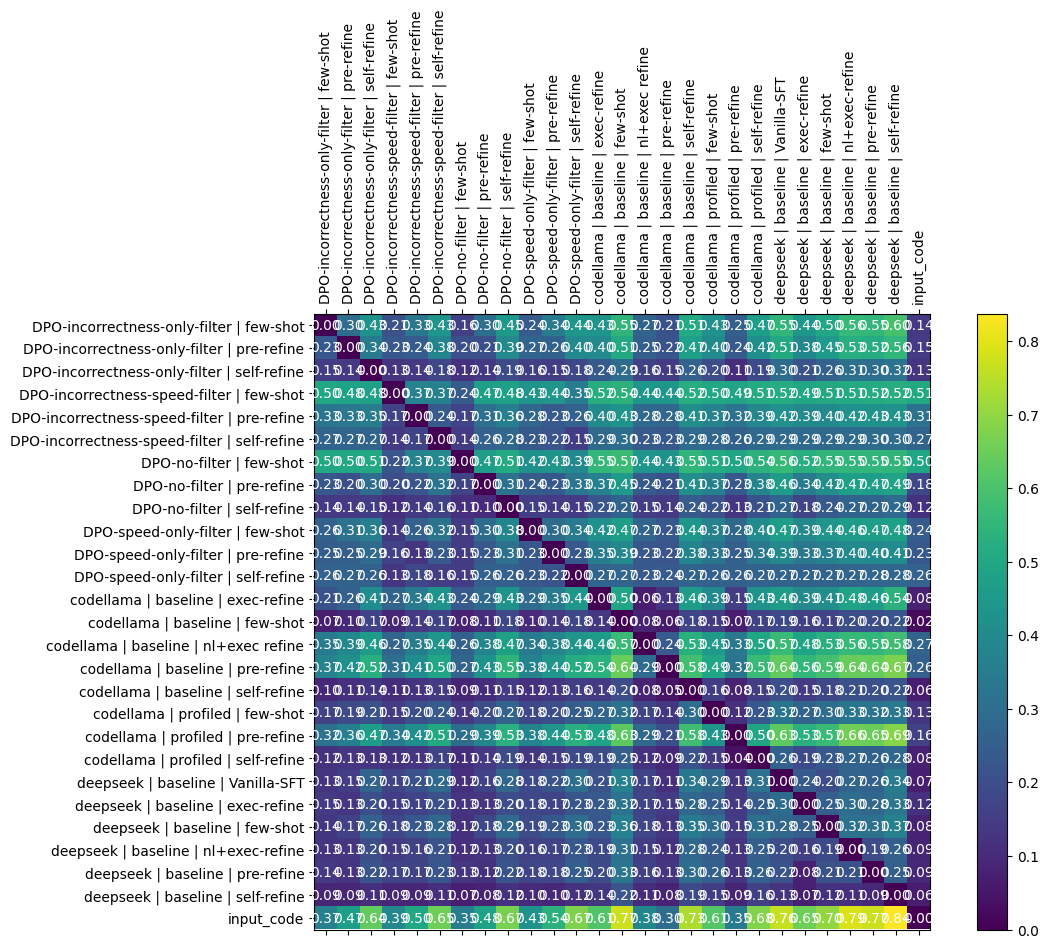

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Convert dictionary to numpy array
rows = list(avg_win_df.keys())
cols = list(next(iter(avg_win_df.values())).keys())
data = np.array([[avg_win_df[row][col] for col in cols] for row in rows])

# Create the heatmap with a larger figure
fig, ax = plt.subplots(figsize=(12, 8))  # Adjust the width (12) and height (8) as needed
cax = ax.matshow(data, cmap='viridis')

# Add colorbar
fig.colorbar(cax)

# Set axis labels
ax.set_xticks(range(len(cols)))
ax.set_yticks(range(len(rows)))
ax.set_xticklabels(cols, rotation=90)
ax.set_yticklabels(rows)

# Add text annotations with 2 decimal places
for i in range(len(rows)):
    for j in range(len(cols)):
        ax.text(j, i, f"{data[i, j]:.2f}", ha='center', va='center', color='white')

plt.show()


In [34]:
len(instance_df[0].keys())

27

In [35]:
len(mapping_df)

27

In [36]:
Counter(list(mapping_df.values()))

Counter({'input_code': 1,
         'deepseek | baseline | pre-refine': 1,
         'deepseek | baseline | few-shot': 1,
         'deepseek | baseline | self-refine': 1,
         'deepseek | baseline | nl+exec-refine': 1,
         'deepseek | baseline | exec-refine': 1,
         'deepseek | baseline | Vanilla-SFT': 1,
         'DPO-no-filter | pre-refine': 1,
         'DPO-no-filter | few-shot': 1,
         'DPO-no-filter | self-refine': 1,
         'DPO-incorrectness-only-filter | pre-refine': 1,
         'DPO-incorrectness-only-filter | few-shot': 1,
         'DPO-incorrectness-only-filter | self-refine': 1,
         'DPO-speed-only-filter | pre-refine': 1,
         'DPO-speed-only-filter | few-shot': 1,
         'DPO-speed-only-filter | self-refine': 1,
         'DPO-incorrectness-speed-filter | pre-refine': 1,
         'DPO-incorrectness-speed-filter | few-shot': 1,
         'DPO-incorrectness-speed-filter | self-refine': 1,
         'codellama | baseline | pre-refine': 1,
         

In [37]:
len(mapping_df)

27

In [38]:
stats_df

Setting  All Passed Rate  \
0       DPO-incorrectness-only-filter | few-shot         0.539043   
1     DPO-incorrectness-only-filter | pre-refine         0.448363   
2    DPO-incorrectness-only-filter | self-refine         0.193955   
3      DPO-incorrectness-speed-filter | few-shot         0.428212   
4    DPO-incorrectness-speed-filter | pre-refine         0.327456   
5   DPO-incorrectness-speed-filter | self-refine         0.183879   
6                       DPO-no-filter | few-shot         0.447103   
7                     DPO-no-filter | pre-refine         0.375315   
8                    DPO-no-filter | self-refine         0.187657   
9               DPO-speed-only-filter | few-shot         0.411839   
10            DPO-speed-only-filter | pre-refine         0.294710   
11           DPO-speed-only-filter | self-refine         0.134761   
12            codellama | baseline | exec-refine         0.559194   
13               codellama | baseline | few-shot         0.226700   
14         codellama | baseline | nl+exec refine         0.557935   
15             codellama | baseline | pre-refine         0.614610   
16            codellama | baseline | self-refine         0.144836   
17               codellama | profiled | few-shot         0.312343   
18             codellama | profiled | pre-refine         0.654912   
19            codellama | profiled | self-refine         0.197733   
20             deepseek | baseline | Vanilla-SFT         0.352645   
21             deepseek | baseline | exec-refine         0.283375   
22                deepseek | baseline | few-shot         0.351385   
23          deepseek | baseline | nl+exec-refine         0.289673   
24              deepseek | baseline | pre-refine         0.318640   
25             deepseek | baseline | self-refine         0.147355   
26                                    input_code         0.803526   

    Average Passed Rate  Average Time Speed Up  Average Memory Speed Up  \
0              0.666352               0.972764                 0.941968   
1              0.623006               1.214378                 1.081981   
2              0.349181               1.147483                 0.769855   
3              0.545508               1.206922                 0.855564   
4              0.461419               1.011169                 0.810644   
5              0.310600               1.240676                 0.694682   
6              0.590428               1.354193                 1.139023   
7              0.539127               1.237165                 1.042492   
8              0.318451               0.971935                 0.613985   
9              0.528610               0.985836                 0.852228   
10             0.443892               0.804477                 0.687984   
11             0.278988               1.489451                 0.564022   
12             0.644962               0.889923                 1.355358   
13             0.255647               0.303023                 0.416360   
14             0.645151               0.944449                 1.347189   
15             0.742024               1.199890                 1.504075   
16             0.259488               0.753923                 0.553522   
17             0.377330               0.594499                 0.584062   
18             0.755961               1.161381                 1.404314   
19             0.315218               0.888464                 0.733751   
20             0.488602               0.979226                 1.045222   
21             0.403967               1.009531                 0.790007   
22             0.486734               1.375042                 1.138948   
23             0.407893               1.605620                 0.932892   
24             0.434950               1.188818                 0.922150   
25             0.273804               1.181297                 0.725763   
26             0.940092               1.000000                 1.000000   

    Std

In [39]:
stats_df.columns

Index(['Setting', 'All Passed Rate', 'Average Passed Rate',
       'Average Time Speed Up', 'Average Memory Speed Up', 'Std Time Speed Up',
       'Std Memory Speed Up'],
      dtype='object')

In [40]:
# add a new column to stats_df
stats_df['win_rate'] = stats_df['Setting'].apply(lambda x: avg_win_df[x][SELECTED_INPUT_ID])

# round all values to 2 decimal places
stats_df = stats_df.round(3)

columns_keep = "Setting", "All Passed Rate", "Average Time Speed Up", "Average Memory Speed Up", "win_rate"
assert(all(x in stats_df.columns for x in columns_keep))

# keep only the columns in columns_keep
stats_df = stats_df[[x for x in columns_keep]]

In [41]:
----------

SyntaxError: invalid syntax (1776373828.py, line 1)

In [42]:
arr = list(mapping_df.values())
# rearrabge rows based on position of setting in arr
stats_df['order'] = stats_df['Setting'].apply(lambda x: arr.index(x))
stats_df = stats_df.sort_values('order').drop(columns=['order'])

# multiply "All Passed Rate" by 100
stats_df['All Passed Rate'] = stats_df['All Passed Rate'] * 100


In [43]:
stats_df

Setting  All Passed Rate  \
26                                    input_code             80.4   
24              deepseek | baseline | pre-refine             31.9   
22                deepseek | baseline | few-shot             35.1   
25             deepseek | baseline | self-refine             14.7   
23          deepseek | baseline | nl+exec-refine             29.0   
21             deepseek | baseline | exec-refine             28.3   
20             deepseek | baseline | Vanilla-SFT             35.3   
7                     DPO-no-filter | pre-refine             37.5   
6                       DPO-no-filter | few-shot             44.7   
8                    DPO-no-filter | self-refine             18.8   
1     DPO-incorrectness-only-filter | pre-refine             44.8   
0       DPO-incorrectness-only-filter | few-shot             53.9   
2    DPO-incorrectness-only-filter | self-refine             19.4   
10            DPO-speed-only-filter | pre-refine             29.5   
9               DPO-speed-only-filter | few-shot             41.2   
11           DPO-speed-only-filter | self-refine             13.5   
4    DPO-incorrectness-speed-filter | pre-refine             32.7   
3      DPO-incorrectness-speed-filter | few-shot             42.8   
5   DPO-incorrectness-speed-filter | self-refine             18.4   
15             codellama | baseline | pre-refine             61.5   
13               codellama | baseline | few-shot             22.7   
16            codellama | baseline | self-refine             14.5   
12            codellama | baseline | exec-refine             55.9   
14         codellama | baseline | nl+exec refine             55.8   
18             codellama | profiled | pre-refine             65.5   
17               codellama | profiled | few-shot             31.2   
19            codellama | profiled | self-refine             19.8   

    Average Time Speed Up  Average Memory Speed Up  win_rate  
26                  1.000                    1.000     0.000  
24                  1.189                    0.922     0.092  
22                  1.375                    1.139     0.085  
25                  1.181                    0.726     0.065  
23                  1.606                    0.933     0.087  
21                  1.010                    0.790     0.119  
20                  0.979                    1.045     0.071  
7                   1.237                    1.042     0.182  
6                   1.354                    1.139     0.497  
8                   0.972                    0.614     0.122  
1                   1.214                    1.082     0.149  
0                   0.973                    0.942     0.140  
2                   1.147                    0.770     0.128  
10                  0.804                    0.688     0.231  
9                   0.986                    0.852     0.244  
11                  1.489                    0.564     0.262  
4                   1.011                    0.811     0.311  
3                   1.207                    0.856     0.508  
5                   1.241                    0.695     0.269  
15                  1.200                    1.504     0.257  
13                  0.303                    0.416     0.022  
16                  0.754                    0.554     0.064  
12                  0.890                    1.355     0.076  
14                  0.944                    1.347     0.274  
18                  1.161                    1.404     0.161  
17                  0.594                    0.584     0.131  
19                  0.888                    0.734     0.077

In [44]:
# convert to csv
stats_df.to_csv("stats_df.csv", index=False)